# DIGITAL MARKETING CAMPAIGN ANALYSIS

STEP 1 - IMPORT THE LIBRARIES

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

STEP 2 - LOAD AND READ THE DATASET

In [61]:
market_data = pd.read_csv("/Users/rajalakshmishanmuganathan/Downloads/Excel and csv files/Marketing.csv")

In [62]:
market_data.sample(3)

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
69,70,2021-02-07,google_wide,search,127823,1137473,18102.10,2404,48,5,17845.0
243,244,2021-02-23,facebOOK_tier2,social,348934,475992,19350.00,1641,37,3,12225.0


STEP 3 - CLEANING THE DATASET

In [63]:
row, col = market_data.shape
print(f'There are {row} rows and {col} columns in this dataset')

There are 308 rows and 11 columns in this dataset


In [64]:
# checking the dataset for its null values
market_data.isna().sum()

id               0
c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

STEP 4 - FORMATTING THE DATASET

In [65]:
market_data.dtypes

id                 int64
c_date            object
campaign_name     object
category          object
campaign_id        int64
impressions        int64
mark_spent       float64
clicks             int64
leads              int64
orders             int64
revenue          float64
dtype: object

In [66]:
# changing the columns data type
cols_to_change = ['campaign_name', 'category']
for cols in cols_to_change:
    market_data[cols] = market_data[cols].astype("string")
market_data['c_date'] = pd.to_datetime(market_data['c_date'])

In [67]:
#replace the values of 'faceb00K' to 'facebook'
market_data['campaign_name'] = market_data['campaign_name'].str.replace('facebOOK_tier2', 'facebook_tier2')

STEP 5 - FINDING THE KEY METRICS

In [68]:
market_data['cpa'] = market_data['mark_spent'] / market_data['orders']
market_data['cpl'] = market_data['mark_spent'] / market_data['leads']
market_data['roi'] = ( ( market_data['revenue'] - market_data ['mark_spent'] ) / market_data ['mark_spent'] ) * 100
market_data['ctr'] = ( market_data ['clicks'] / market_data['impressions'] ) * 100
market_data['conversion_rate'] = ( market_data ['orders'] / market_data ['clicks'] ) * 100

AGGREGATING THE KEY METRICS BASED ON CAMPAIGN ID AND CATEGORY

In [69]:
#aggregating campaign wise
campaign_summary = market_data.groupby('campaign_name').agg({
    'impressions':'sum',
    'clicks':'sum',
    'leads':'sum',
    'orders':'sum',
    'revenue':'sum',
    'mark_spent':'sum'
}).reset_index()
campaign_summary['cpa'] = campaign_summary ['mark_spent'] / campaign_summary ['orders']
campaign_summary['cpl'] = campaign_summary ['mark_spent'] / campaign_summary ['leads']
campaign_summary['roi'] = ( ( campaign_summary ['revenue'] - campaign_summary ['mark_spent'] ) / campaign_summary ['mark_spent'] ) * 100
campaign_summary['ctr'] = ( campaign_summary ['clicks'] / campaign_summary ['impressions'] ) * 100
campaign_summary['conversion_rate'] = ( campaign_summary ['orders'] / campaign_summary ['clicks'] ) * 100

In [70]:
# aggregating category wise
category_summary = market_data.groupby('category').agg({
    'impressions':'sum',
    'clicks':'sum',
    'leads':'sum',
    'orders':'sum',
    'revenue':'sum',
    'mark_spent':'sum'
}).reset_index()
category_summary['cpa'] = category_summary ['mark_spent'] / category_summary ['orders']
category_summary['cpl'] = category_summary ['mark_spent'] / category_summary ['leads']
category_summary['roi'] = ( ( category_summary ['revenue'] - category_summary ['mark_spent'] ) / category_summary ['mark_spent'] ) * 100
category_summary['ctr'] = ( category_summary ['clicks'] / category_summary ['impressions'] ) * 100
category_summary['conversion_rate'] = ( category_summary ['orders'] / category_summary ['clicks'] ) * 100

PLOTTING AND VISUALISATION

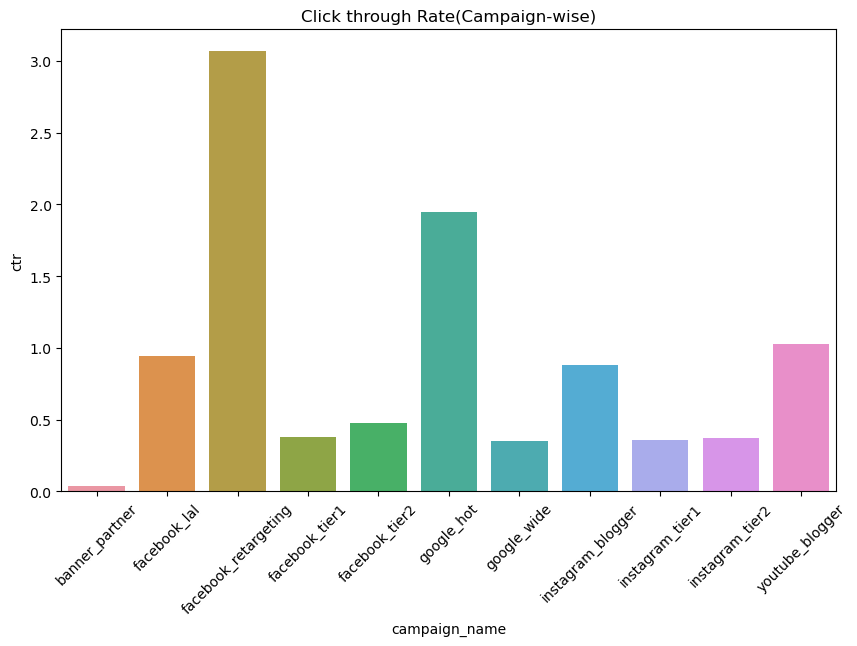

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_summary, x = 'campaign_name', y = 'ctr')
plt.title('Click through Rate(Campaign-wise)')
plt.xticks(rotation= 45)
plt.show()

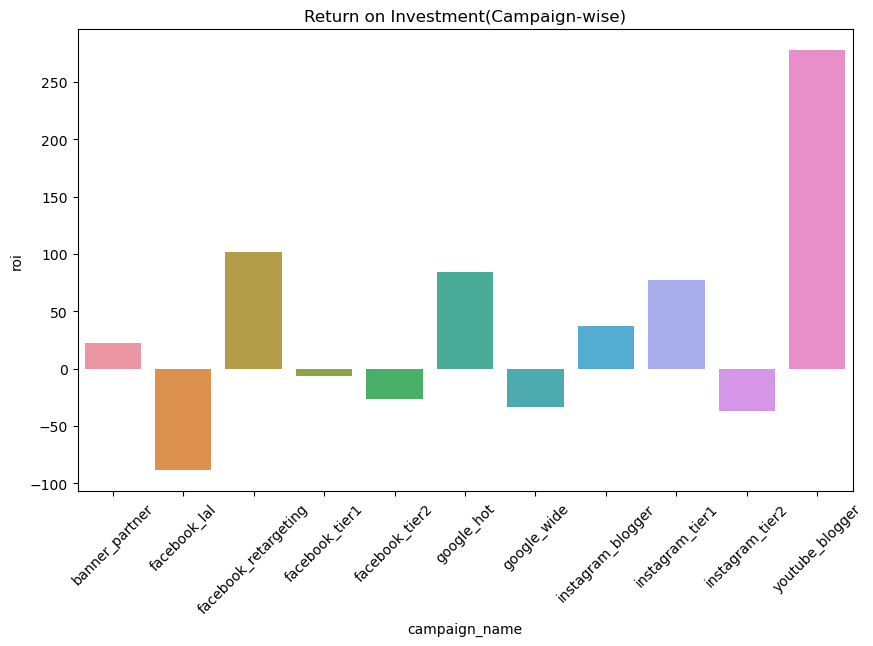

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_summary, x = 'campaign_name', y = 'roi')
plt.title('Return on Investment(Campaign-wise)')
plt.xticks(rotation= 45)
plt.show()

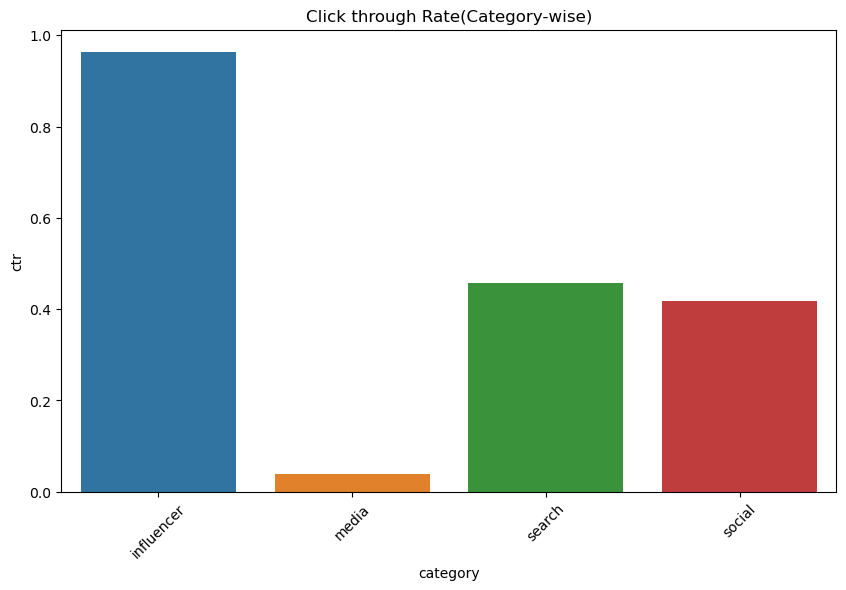

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x = 'category', y = 'ctr')
plt.title('Click through Rate(Category-wise)')
plt.xticks(rotation= 45)
plt.show()

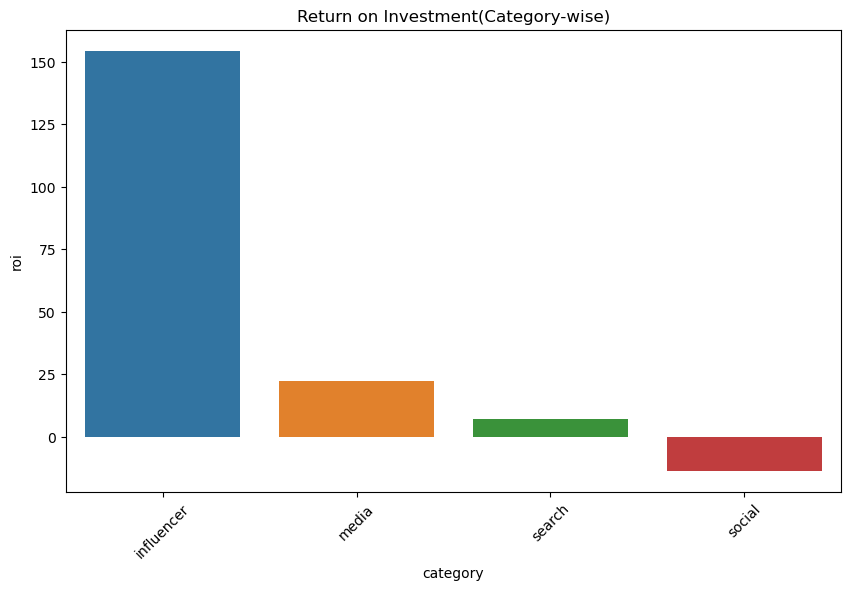

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x = 'category', y = 'roi')
plt.title('Return on Investment(Category-wise)')
plt.xticks(rotation= 45)
plt.show()